# Step 1 Import libraries & Dataset

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# import finall clean data orders_products_customers_merged pkl
path=r'C:\online course\career\python data\202304'

In [4]:
df=pd.read_pickle(os.path.join(path,'02.Data','Prepared data','orders_products_customers_merged.pkl'))

In [5]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,Order Interval,product_id,add_to_cart_order,reordered,...,order_freq_flag,First Name,Last Name,Gender,STATE,Age,dependants,fam_status,income,True
0,2968173,15,prior,15,1,9,7.0,196,2,0,...,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both
1,1870022,15,prior,17,2,16,8.0,196,6,1,...,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both
2,1911383,15,prior,18,2,11,7.0,196,1,1,...,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both
3,2715276,15,prior,21,1,9,7.0,196,1,1,...,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both
4,487368,15,prior,22,1,10,14.0,196,1,1,...,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both


# Step 2: Checking for data security

In [6]:
# checking the given information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29632737 entries, 0 to 29632736
Data columns (total 33 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                object  
 2   eval_set               object  
 3   order_number           int64   
 4   orders_day_of_week     int64   
 5   order_hour_of_day      int64   
 6   Order Interval         float64 
 7   product_id             int64   
 8   add_to_cart_order      int64   
 9   reordered              int64   
 10  product_name           object  
 11  aisle_id               int64   
 12  department_id          int64   
 13  prices                 float64 
 14  price_range_loc        object  
 15  busiest_day            object  
 16  busiest_days           object  
 17  busiest_period_of_day  object  
 18  max_order              int64   
 19  loyalty_flag           object  
 20  avg_price              float64 
 21  spending_flag          object

We could find personally identifiable information (PII):First Name and Last Name,I delete them.

In [7]:
# drop the columns
df=df.drop(columns = ['Last Name','First Name'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29632737 entries, 0 to 29632736
Data columns (total 31 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                object  
 2   eval_set               object  
 3   order_number           int64   
 4   orders_day_of_week     int64   
 5   order_hour_of_day      int64   
 6   Order Interval         float64 
 7   product_id             int64   
 8   add_to_cart_order      int64   
 9   reordered              int64   
 10  product_name           object  
 11  aisle_id               int64   
 12  department_id          int64   
 13  prices                 float64 
 14  price_range_loc        object  
 15  busiest_day            object  
 16  busiest_days           object  
 17  busiest_period_of_day  object  
 18  max_order              int64   
 19  loyalty_flag           object  
 20  avg_price              float64 
 21  spending_flag          object

# step3  Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

## Creating the 'region' column

In [9]:
# Creating an empty list that will become the 'region' column

region = []

In [10]:
# Checking to see how the states are written in the df
df['STATE'].value_counts(dropna = False)

Pennsylvania            610776
California              606063
Georgia                 602311
Rhode Island            601779
New Mexico              601065
Arizona                 600694
North Carolina          596662
Oklahoma                595412
Massachusetts           594994
Alaska                  594233
Minnesota               594007
Wyoming                 590637
Texas                   587906
Virginia                587695
Maine                   585361
Missouri                584460
South Carolina          584046
Louisiana               583194
Colorado                583092
Delaware                583081
Nevada                  582835
Alabama                 582531
North Dakota            582153
New York                581949
Montana                 581691
Arkansas                581023
Kansas                  580232
Washington              580137
Kentucky                579978
Oregon                  579586
South Dakota            579133
Hawaii                  578954
Illinois

In [11]:
# Filling 'region' with 'northeast', 'midwest', 'south', or 'west'
for x in df['STATE']:
    if x in ['Maine','New Hampshire', 'Vermont', 'Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('northeast')
    elif x in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('midwest')
    elif x in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('south')
    else:
        region.append('west')

In [12]:
#create the region column
df['region'] = region

In [13]:
df['region'].value_counts(dropna=False)

south        9869472
west         7589975
midwest      6938634
northeast    5234656
Name: region, dtype: int64

Comparing 'region' with 'spending_flag'

In [14]:
# Creating a crosstab between 'region' and 'spending_flag'
region_spend=pd.crosstab(df['region'],df['spending_flag'],dropna=False)

In [15]:
region_spend

spending_flag,High spender,Low spender
region,,
midwest,142788,6795846
northeast,100166,5134490
south,193109,9676363
west,146151,7443824


In [16]:
# Copying to clipboard to paste in Excel
region_spend.to_clipboard()

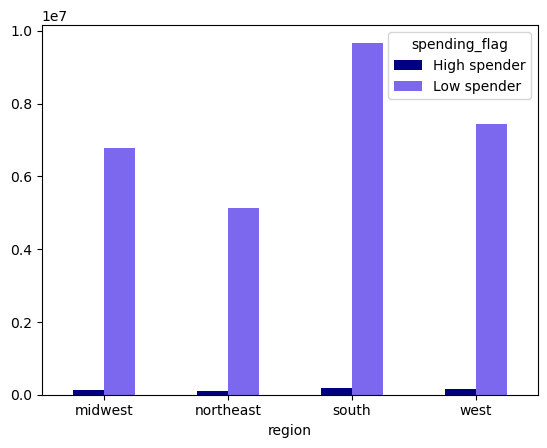

In [17]:
# bar chart for spending flag distribution
region_spending_bar=region_spend.plot.bar(rot=0,color=['navy','mediumslateblue','lightsteelblue'])

The region of south has the most customers in every category.

In [18]:
df['spending_flag'].value_counts(dropna=False)

Low spender     29050523
High spender      582214
Name: spending_flag, dtype: int64

In [19]:
# exporting the bar graph
region_spending_bar.figure.savefig(os.path.join(path, '04.Analysis','regional_spending_bar.png'))

# Step 4The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

Creating the exclusion flag

In [20]:
df.loc[df['max_order']<5,'low_order_flag']='Low order customer'

In [21]:
df.loc[df['max_order'] >= 5, 'low_order_flag'] = 'High order customer'

In [22]:
df['low_order_flag'].value_counts(dropna = False)

High order customer    28607255
Low order customer      1025482
Name: low_order_flag, dtype: int64

Creating a sample with only high order customers

In [23]:
# Creating the sample

df_high = df[df['low_order_flag'] == 'High order customer']

In [24]:
df_high.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,Order Interval,product_id,add_to_cart_order,reordered,...,order_freq_flag,Gender,STATE,Age,dependants,fam_status,income,True,region,low_order_flag
0,2968173,15,prior,15,1,9,7.0,196,2,0,...,Frequent customer,Female,Indiana,69,0,divorced/widowed,54313,both,midwest,High order customer
1,1870022,15,prior,17,2,16,8.0,196,6,1,...,Frequent customer,Female,Indiana,69,0,divorced/widowed,54313,both,midwest,High order customer
2,1911383,15,prior,18,2,11,7.0,196,1,1,...,Frequent customer,Female,Indiana,69,0,divorced/widowed,54313,both,midwest,High order customer
3,2715276,15,prior,21,1,9,7.0,196,1,1,...,Frequent customer,Female,Indiana,69,0,divorced/widowed,54313,both,midwest,High order customer
4,487368,15,prior,22,1,10,14.0,196,1,1,...,Frequent customer,Female,Indiana,69,0,divorced/widowed,54313,both,midwest,High order customer


In [ ]:
# Exporting the sample as orders_products_high.pkl

df_high.to_pickle(os.path.join(path,'02.Data','Prepared data','orders_products_high.pkl'))

# Step 5-Step9: Profiling Customers

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [25]:
df.describe()

,order_id,order_number,orders_day_of_week,order_hour_of_day,Order Interval,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_price,median_freq,Age,dependants,income
count,2.963274e+07,2.963274e+07,2.963274e+07,2.963274e+07,2.963274e+07,2.963274e+07,2.963274e+07,2.963274e+07,2.963274e+07,2.963274e+07,2.963274e+07,2.963274e+07,2.963274e+07,2.963274e+07,2.963274e+07,2.963274e+07,2.963274e+07
mean,1.710666e+06,1.853383e+01,2.741270e+00,1.340673e+01,1.097613e+01,2.559488e+04,8.356653e+00,6.331558e-01,7.118836e+01,9.923083e+00,1.192784e+01,3.477054e+01,1.188423e+01,9.938668e+00,4.946307e+01,1.501852e+00,9.956191e+04
std,9.872169e+05,1.769213e+01,2.087390e+00,4.247300e+00,8.710052e+00,1.408073e+04,7.135222e+00,4.819435e-01,3.821794e+01,6.282175e+00,4.918745e+02,2.522810e+01,7.785988e+01,6.783682e+00,1.848680e+01,1.118804e+00,4.315336e+04
min,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.560350e+05,6.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354000e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.500000e+01,7.390397e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.715500e+04
50%,1.710743e+06,1.200000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.527200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.824595e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.666300e+04
75%,2.565346e+06,2.500000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794000e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.900000e+01,8.250357e+00,1.200000e+01,6.500000e+01,3.000000e+00,1.279510e+05
max,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


Profiles of Age

In [26]:
df.loc[(df['Age']<=25),'age_profile']='18-25'
df.loc[(df['Age'] > 25) & (df['Age']<=40),'age_profile']='26-40'
df.loc[(df['Age'] > 40) & (df['Age']<=55),'age_profile']='41-55'
df.loc[(df['Age'] > 55), 'age_profile']='55+'
df['age_profile'].value_counts(dropna = False) 

55+      11966116
41-55     6992612
26-40     6972782
18-25     3701227
Name: age_profile, dtype: int64

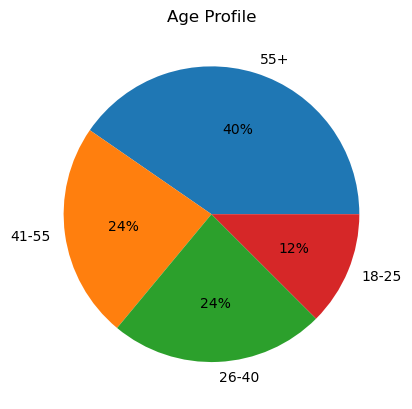

In [27]:
#age pie chart
age_profile_pie=df['age_profile'].value_counts().plot.pie(title ='Age Profile', label = '', autopct=('%1.f%%'))

In [28]:
# exporting the pie
age_profile_pie.figure.savefig(os.path.join(path, '04.Analysis','age_profile_pie.png'))

In [29]:
#Age statistics
age_sums = df.groupby(['age_profile']).agg({'Order Interval' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
age_sums

Order Interval                  prices                      \
                       min   max       mean    min      max       mean   
age_profile                                                              
18-25                  0.0  30.0  10.961530    1.0  99999.0  12.225039   
26-40                  0.0  30.0  10.992444    1.0  99999.0  11.951306   
41-55                  0.0  30.0  10.985597    1.0  99999.0  11.714668   
55+                    0.0  30.0  10.965596    1.0  99999.0  11.946801   

                          
                     sum  
age_profile               
18-25         45247646.0  
26-40         83333850.4  
41-55         81916130.0  
55+          142956802.7

Customers in all age profiles have roughly 11 days in between their orders.

In [30]:
#crosstab between ages and regions
crosstab_region_age = pd.crosstab(df['region'], df['age_profile'], dropna = False)

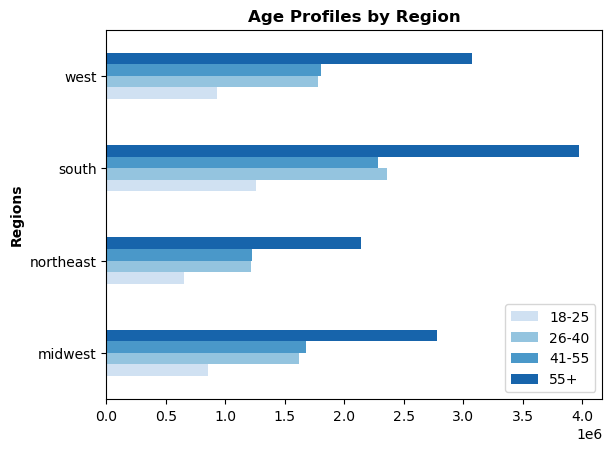

In [31]:
#create a stacked bar chart
region_age = crosstab_region_age.plot(kind = 'barh', color = sns.color_palette('Blues', 4))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Age Profiles by Region', fontweight = 'bold')
plt.show()

In [32]:
# exporting the bar
region_age.figure.savefig(os.path.join(path, '04.Analysis','region_age_bar.png'))

Department

In [35]:
#import department dataframe
df_dep=pd.read_csv(os.path.join(path,'02.Data','Prepared data','departments_wrangled.csv'))

In [36]:
df_dep.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [37]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [38]:
# merge departments dataframe with df dataframe
df_all = df.merge(df_dep, on = 'department_id')

In [39]:
df_all.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,Order Interval,product_id,add_to_cart_order,reordered,...,STATE,Age,dependants,fam_status,income,True,region,low_order_flag,age_profile,department
0,2968173,15,prior,15,1,9,7.0,196,2,0,...,Indiana,69,0,divorced/widowed,54313,both,midwest,High order customer,55+,beverages
1,1870022,15,prior,17,2,16,8.0,196,6,1,...,Indiana,69,0,divorced/widowed,54313,both,midwest,High order customer,55+,beverages
2,1911383,15,prior,18,2,11,7.0,196,1,1,...,Indiana,69,0,divorced/widowed,54313,both,midwest,High order customer,55+,beverages
3,2715276,15,prior,21,1,9,7.0,196,1,1,...,Indiana,69,0,divorced/widowed,54313,both,midwest,High order customer,55+,beverages
4,487368,15,prior,22,1,10,14.0,196,1,1,...,Indiana,69,0,divorced/widowed,54313,both,midwest,High order customer,55+,beverages


In [40]:
#create crosstab of age and department
crosstab_dept_age = pd.crosstab(df_all['department'], df_all['age_profile'], dropna = False)

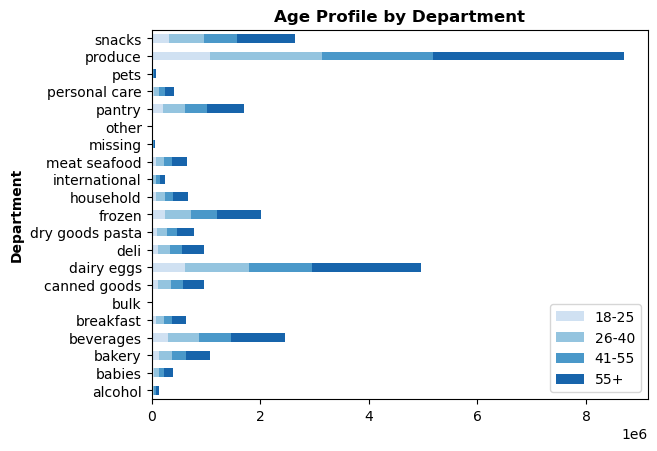

In [41]:
#bar chart of age group and department
dept_age = crosstab_dept_age.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 4))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Age Profile by Department', fontweight = 'bold')
plt.show()

Produce, dairy eggs, and snacks are the top three departments across all age groups. 

In [42]:
# exporting the bar
dept_age .figure.savefig(os.path.join(path, '04.Analysis','dept_age_bar.png'))

Income profiles

In [46]:
df_all.loc[(df_all['income'] <= 50000), 'income_profile'] = '<=50k'
df_all.loc[(df_all['income'] > 50000) & (df_all['income'] <= 150000), 'income_profile'] = '50k - 150k'
df_all.loc[(df_all['income'] > 150000), 'income_profile'] = '150k+'
df_all['income_profile'].value_counts(dropna = False)

50k - 150k    22669306
150k+          3715800
<=50k          3247631
Name: income_profile, dtype: int64

Main customers is that income profile from the 50k-150k  represent the highest revenue for Instacart.

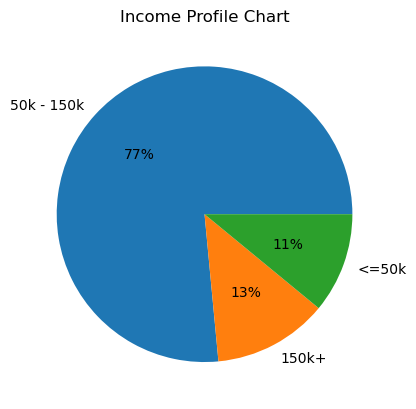

In [47]:
#income profile pie chart
income_profile_pie = df['income_profile'].value_counts().plot.pie(title ='Income Profile Chart', label = '', autopct=('%1.f%%'))

In [48]:
#income statistics
income_sums = df_all.groupby(['income_profile']).agg({'Order Interval' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
income_sums

Order Interval                  prices                      \
                          min   max       mean    min      max       mean   
income_profile                                                              
150k+                     0.0  30.0  10.812037    1.0  99999.0  32.793323   
50k - 150k                0.0  30.0  10.934084    1.0  99999.0   9.256760   
<=50k                     0.0  30.0  11.457331    1.0     25.0   6.699242   

                             
                        sum  
income_profile               
150k+           121853429.6  
50k - 150k      209844332.0  
<=50k            21756667.5

In [49]:
# exporting the pie
income_profile_pie.figure.savefig(os.path.join(path, '04.Analysis','income_profile_pie.png'))

Customers in the 50k-150k income group represent the majority.

In [50]:
#create crosstab of regions and income grouos
crosstab_region_income = pd.crosstab(df_all['region'], df_all['income_profile'], dropna = False)

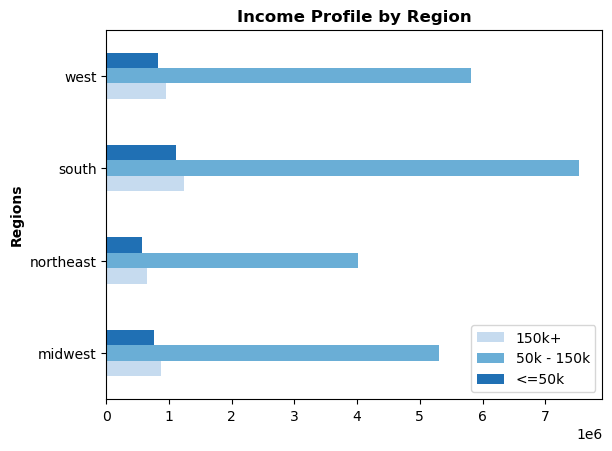

In [51]:
#bar chart of the regions broken down by income groups
region_income = crosstab_region_income.plot(kind = 'barh', color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Income Profile by Region', fontweight = 'bold')
plt.show()

In [52]:
# exporting the bar
region_income.figure.savefig(os.path.join(path, '04.Analysis','region_income_bar.png'))

In [53]:
#create a crosstab of department and income groups
crosstab_dept_income = pd.crosstab(df_all['department'], df_all['income_profile'], dropna = False)

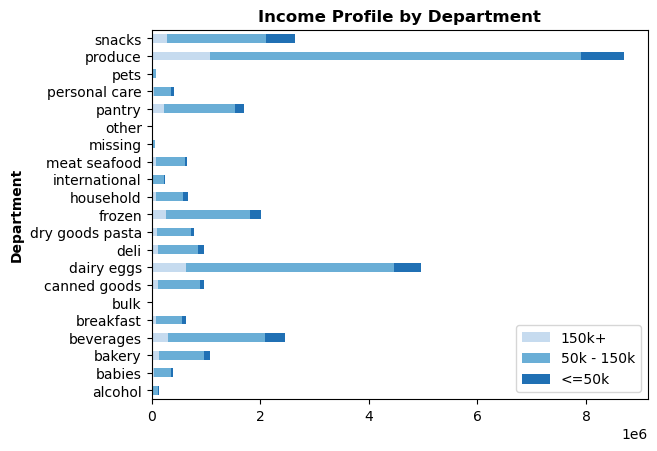

In [54]:
#bar chart of department group by income 
dept_income = crosstab_dept_income.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Income Profile by Department', fontweight = 'bold')
plt.show()

In [55]:
# exporting the bar
dept_income.figure.savefig(os.path.join(path, '04.Analysis','dept_income_bar.png'))

Produce and dairy are the top two departments across the income profiles.

In [56]:
#create crosstab of regions and income grouos
crosstab_region_income = pd.crosstab(df_all['region'], df_all['income_profile'], dropna = False)

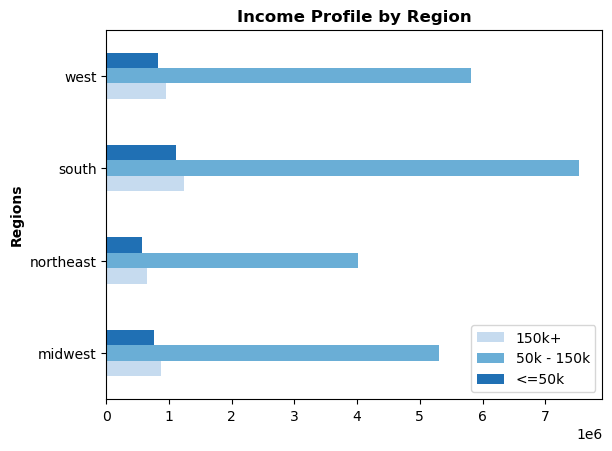

In [57]:
#bar chart of the regions broken down by income groups
region_income = crosstab_region_income.plot(kind = 'barh', color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Income Profile by Region', fontweight = 'bold')
plt.show()

Family Status Profiles

In [58]:
df_all.loc[(df_all['dependants'] == 0), 'family_profile'] = 'Single Adult'
df_all.loc[(df_all['dependants'] != 0), 'family_profile'] = 'Family'
df_all['family_profile'].value_counts(dropna = False)

Family          22227640
Single Adult     7405097
Name: family_profile, dtype: int64

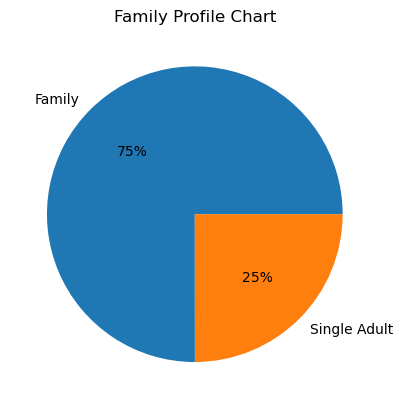

In [59]:
#Family status pie chart
family_profile_pie = df_all['family_profile'].value_counts().plot.pie(title = 'Family Profile Chart', label = '', autopct = ('%1.f%%'))

In [60]:
# exporting the pie
family_profile_pie.figure.savefig(os.path.join(path, '04.Analysis','family_profile_pie.png'))

In [61]:
#family status statistics
family_sums = df_all.groupby(['family_profile']).agg({'Order Interval': ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
family_sums

Order Interval                  prices                      \
                          min   max       mean    min      max       mean   
family_profile                                                              
Family                    0.0  30.0  10.984938    1.0  99999.0  11.936914   
Single Adult              0.0  30.0  10.949673    1.0  99999.0  11.900589   

                             
                        sum  
family_profile               
Family          265329416.2  
Single Adult     88125012.9

In [62]:
#Crosstab of families and regions
crosstab_region_family = pd.crosstab(df_all['region'], df_all['family_profile'], dropna = False)

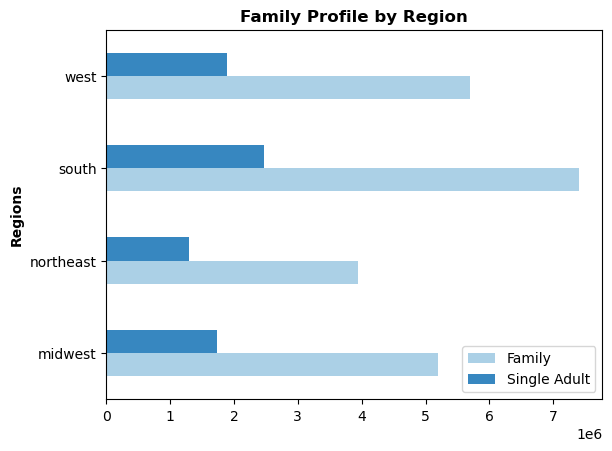

In [63]:
#bar chart of family groups across the regions
region_family = crosstab_region_family.plot(kind = 'barh', color = sns.color_palette('Blues', 2))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Family Profile by Region', fontweight = 'bold')
plt.show()

The south Families are  highest them others.

In [64]:
# exporting the bar
region_family.figure.savefig(os.path.join(path, '04.Analysis','region_family_bar.png'))

In [65]:
#crosstab of family profile and department
crosstab_dept_family = pd.crosstab(df_all['department'], df_all['family_profile'], dropna = False)

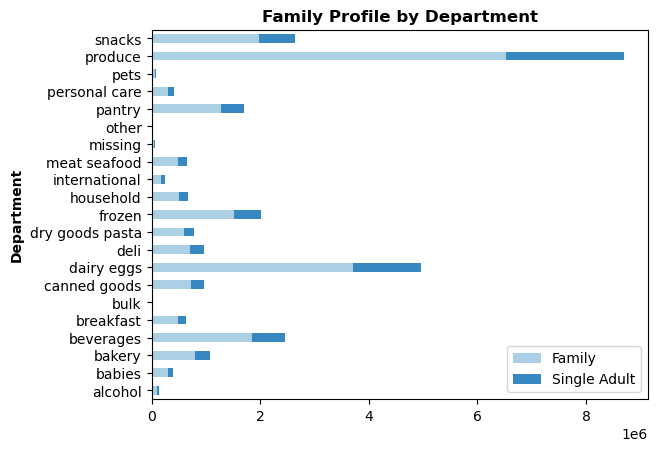

In [66]:
#stacked bar chart of family profiles by department
dept_family = crosstab_dept_family.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 2))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Family Profile by Department', fontweight = 'bold')
plt.show()

In [67]:
# exporting the bar
dept_family.figure.savefig(os.path.join(path, '04.Analysis','dept_family_bar.png'))

# Profiling orders from each day of the week

In [68]:
df_all['orders_day_of_week'].value_counts(dropna = False)

0    5639396
1    5186103
6    4088911
5    3867518
2    3854148
3    3520775
4    3475886
Name: orders_day_of_week, dtype: int64

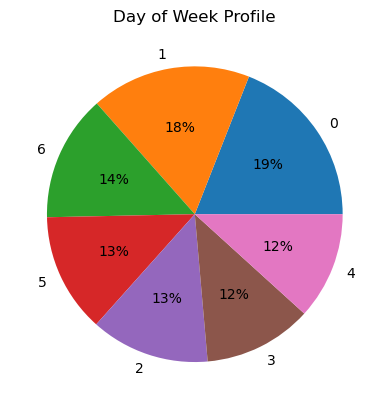

In [69]:
#Pie chart of orders for each day of the week
day_of_week_pie = df_all['orders_day_of_week'].value_counts().plot.pie(title = 'Day of Week Profile', label = '', autopct = ('%1.f%%'))

Saturday,the the day of the week with the highest orders.

In [70]:
#statistics of the day of the week orders profil
day_of_week_sums = df_all.groupby(['orders_day_of_week']).agg({'Order Interval' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
day_of_week_sums

Order Interval                  prices                      \
                              min   max       mean    min      max       mean   
orders_day_of_week                                                              
0                             0.0  30.0  11.488120    1.0  99999.0  11.146519   
1                             0.0  30.0  11.173391    1.0  99999.0  12.115434   
2                             0.0  30.0  11.144860    1.0  99999.0  12.355128   
3                             0.0  30.0  10.748278    1.0  99999.0  12.240052   
4                             0.0  30.0  10.419636    1.0  99999.0  12.059136   
5                             0.0  30.0  10.325913    1.0  99999.0  12.817517   
6                             0.0  30.0  11.144996    1.0  99999.0  11.142769   

                                
                           sum  
orders_day_of_week              
0                   62859635.8  
1                   62831887.1  
2                   47618490.0  
3                   43094467.4  
4                   41916182.2  
5                   49571977.0  
6                   45561789.6

Saturday is the day with the highest revenue, which aligns with the highest orders also. 

In [71]:
#crosstab of day of the week orders and regions
crosstab_region_day_of_week = pd.crosstab(df_all['region'], df_all['orders_day_of_week'], dropna = False)

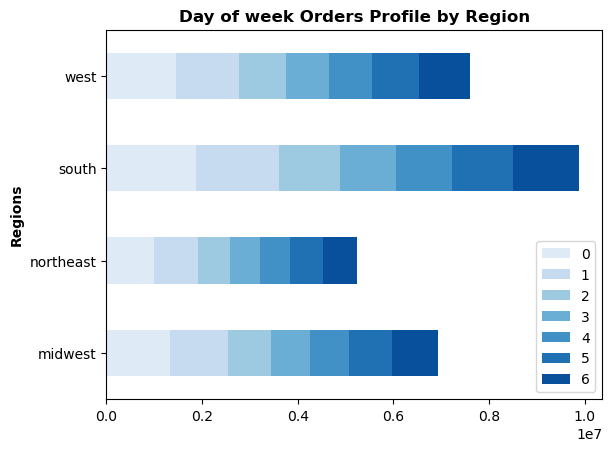

In [72]:
#stacked bar chart of day of the week orders broken down by regions
region_day_of_week = crosstab_region_day_of_week.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 7))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Day of week Orders Profile by Region', fontweight = 'bold')
plt.show()

In [73]:
# exporting the bar
region_day_of_week.figure.savefig(os.path.join(path, '04.Analysis','region_day_of_week_bar.png'))

In [74]:
#crosstab of orders day of the week and departments
crosstab_dept_day_of_week = pd.crosstab(df_all['department'], df_all['orders_day_of_week'], dropna = False)

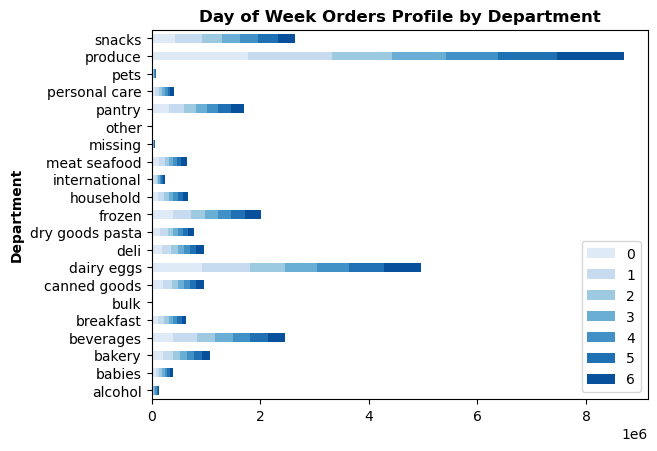

In [75]:
#stacked bar chart of orders day of the week broken down by department
dept_day_of_week = crosstab_dept_day_of_week.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 7))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Day of Week Orders Profile by Department', fontweight = 'bold')
plt.show()

In [76]:
# exporting the bar
dept_day_of_week.figure.savefig(os.path.join(path, '04.Analysis','dept_day_of_week_bar.png'))

In [77]:
# exporting data
df_all.to_pickle(os.path.join(path,'02.Data','Prepared data','orders_products_all.pkl'))